# COMP47700 Speech and Audio PL3: Speech analysis and feature extraction
---
## Learning outcomes
This practical tutorial covers the following learning outcomes within the COMP47700 Speech and Audio module:
* Analyse speech and audio signals and features (**LO1**)
  * Carry out an analysis of speech wav files using spectrogram plots and varying key parameters like `offset`, `duration`, and `n_fft`.
* Articulate the characteristics of speech, speech production and speech understanding (**LO2**)
  * Compute the spectrum for speech signals and extract the frequency formants (F1 and F2) and the fundamental frequency (F0) using `librosa`.
* Describe the signal characteristics of speech and audio signals using appropriate terminology (**LO3**)
  * Visualise and explore the distribution of frequency formants (F1, F2)  and the fundamental frequency (F0) for different speech utterances.
* Create programmes to conduct experiments on speech and audio samples building on third software libraries (**LO6**)
  * Download and extract compressed datasets from an external source using Python libraries.
  * Setup and organise files for data analysis using `pandas` dataframes.

## Module topics
This practical tutorial builds on the following core topics:
* Speech production, characteristics of speech and structure of speech (Unit 3)
* How we hear, speech auditory perception (Unit 4)

## Why is this important?
After gaining familiarity with basic tools in Python to read, manipulate and generate audio and speech digital signals, this practical tutorial explores speech signals characteristics and speech production. A solid understanding of these concepts is foundational for developing effective and accurate applications in Python, particularly in the fields of speech processing, natural language processing, machine learning, and audio signal processing.

## Structure of this tutorial
This practical tutorial contains different sections:
* **Live coding:** Basic theory, demos and coding examples presented by the lecturer on site (unmarked)
* **Student activity:** Familiarisation and coding exercises to be completed by the students and followed by a short discussion on site (unmarked)



*********** Highlight **********
* **Assignment:** Three (3) take home problem/coding questions to be completed by the students and due in two (2) weeks from the day the practical tutorial is given. Assignment questions represent fifteen (15) mark points.

## Setup notes
We will be using Google Colabs for our labs but if you wish to run speech and audio projects locally (not recommended) you will need a manage your own Python environment setup with a number of important packages.

Some important libraries for this practical tutorial are:

* [numpy](https://numpy.org) is the fundamental package for scientific computing with Python. From a signal processing perspective it allow us to represent continuous signals as discrete digitally sampled time series.
* [matplotlib](https://matplotlib.org) is a plotting and data visualisation library. Pyplot is a Matplotlib module that allows MATLAB-like interface to the matplotlib library funtions. Practically speaking, this means that you can build up a figure plot step by step, e.g. create a figure, add axes, add data to plot, customise the title and axes labels and change to look of the figure.
* [librosa](librosa.github.io) is a Python package for music and audio processing. It allows handling audio files and provides tasks for spectral analysis, feature extraction, spectrogram visualization, etc.
* [fftpack](https://docs.scipy.org/doc/scipy/reference/fftpack.html) this package provides a set of functions for performing FFT operations on arrays in Python. The FFT is particularly useful for analyzing signals in the frequency domain, as it allows you to transform a time-domain signal into its frequency components.

---
### **Live coding:** Loading libraries and helper functions
Get our working environment ready and load helper functions.
1. Import the libraries (`fftpack, listdir`) and setup the notebook for magic plots.
2. Load the function `plotSpectrum` to help us plot the speech spectrum.

In [10]:
#Imports and Magic
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io, os
from os import listdir
from scipy import fftpack
from os import listdir
import IPython.display as ipd
#from google.colab import files # could not get this to work in Jupyter
import zipfile
%matplotlib inline

`plotSpectrum` is just a helper function to allow us to plot the spectrum with labelled axes with a set range.

In [1]:

def plotSpectrum(freq,mag,fname):

    complex
    fig1, ax=plt.subplots(1)

    ax.plot(freq, mag, color='gray')
    plt.grid()
    plt.title(fname)
    plt.xlim((0,3000))
    plt.xlabel('Freq. (Hz)')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.savefig('plots/'+fname+'.png')

### **Live coding:** Downloading and extracting lab zip file from Github

**Notes:** You can inspect the extracted folder in the files section at the table of contents.

In [2]:
# Download the zip file
!wget https://github.com/COMP47700-Speech-and-Audio/PL3-Speech-analysis-and-feature-extraction/raw/main/PL3_files.zip

--2025-02-26 11:02:25--  https://github.com/COMP47700-Speech-and-Audio/PL3-Speech-analysis-and-feature-extraction/raw/main/PL3_files.zip
Resolving github.com (github.com)... 4.208.26.197
Connecting to github.com (github.com)|4.208.26.197|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/COMP47700-Speech-and-Audio/PL3-Speech-analysis-and-feature-extraction/main/PL3_files.zip [following]
--2025-02-26 11:02:26--  https://raw.githubusercontent.com/COMP47700-Speech-and-Audio/PL3-Speech-analysis-and-feature-extraction/main/PL3_files.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1073400 (1.0M) [application/zip]
Saving to: ‘PL3_files.zip’

PL3_files.zip       100%[===================>]   1.02M  --.

In [3]:
import zipfile

zipname = 'PL3_files.zip'
# Extract the zip file
with zipfile.ZipFile(zipname, 'r') as zip_ref:
    zip_ref.extractall()  # Extract all files to the current directory

In [12]:
%cd /PL3_files/

[Errno 2] No such file or directory: '/PL3_files/'
/Users/yash/Documents/course/Semester 2 /Speech Audio


/Users/yash/Documents/course/Semester 2 /Speech Audio/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


### **Live coding:** List files and setup dataframe
1. Load list of wav files for analysis (`listdir`)
2. Parse out word names and create dataframe columns (`split`)

In [14]:
basedir='./PL3_files/phonemes/'
phonemefilenames=listdir(basedir)
phonemenames=[]
formants=[[],[]]
phonemefilenames = [x for x in phonemefilenames if x.__contains__('.wav')] # remove non-wavfiles from list

# parse out the word names from the files by getting the text between the - and the .wav extn
phonemenames = [name.split('-')[-1].split('.')[0] for name in phonemefilenames]
speakerid = [name.split('-')[0].split('.')[0] for name in phonemefilenames]
dfformants=pd.DataFrame(columns=['speaker','word','f1','f2'])
dfformants['speaker']=speakerid
dfformants['word']=phonemenames

### **Live coding:** Data inspection
Before we do anything let's sanity check the data by looking at it and listening to it.
1. Load the wav files changing the `offset` and `duration` parameters (`librosa.load`)
2. Plot the corresponding spectrogram (`librosa.display.specshow`)
3. Instantiate playback widgets for playing the audio files.
**Note:** `offset`, start reading after this time (in seconds). `duration`, only loads up to this much audio (in seconds). `n_fft`, length of the windowed signal after padding with zeros. Default value is `n_fft = 2048` (well suited for music signals), for speech processing common value is `n_fft = 512`.

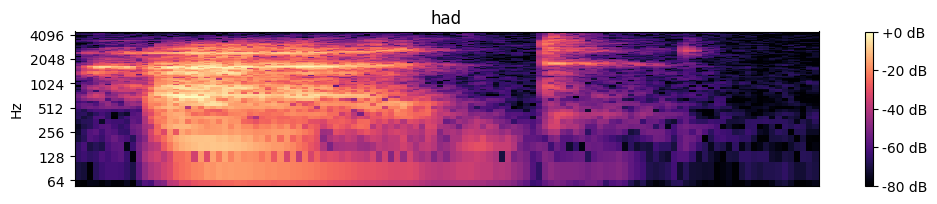

In [15]:
fileidx = 1
x_1, sr = librosa.load(basedir+phonemefilenames[fileidx],offset=.1, duration=.7)
plt.figure(figsize=(12, 2))
D1 = librosa.amplitude_to_db(np.abs(librosa.stft(x_1,n_fft=512)),  ref=np.max)
librosa.display.specshow(D1, y_axis='log')
plt.title(phonemenames[fileidx])
plt.ylim(50,4500)
plt.colorbar(format='%+2.0f dB')

ipd.Audio(x_1, rate=sr)

### **Student activity #1:** Spectrogram representation
* Load the wav files corresponding to the words **had, head, hid, hood,** and **whod** setting the `offset` and `duration` to 0.1 and 0.6 respectively.
* Adapt the code above to iteratively plot the spectrogram representations for the loaded words. Set the `n_fft` parameter to 256.
* Instantiate playback widgets for playing the audio files.

**Note:** To iteratively display playback widgets use the `IPython.display` method (e.g., `ipd.display(ipd.Audio(signal, rate))`).

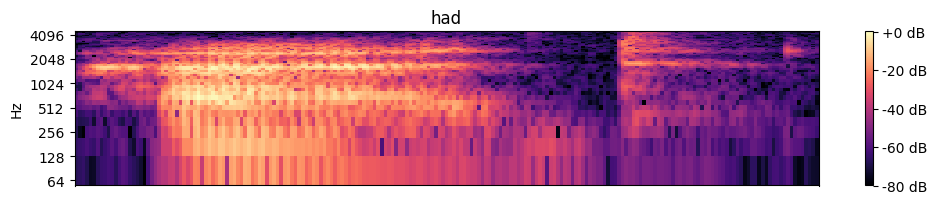

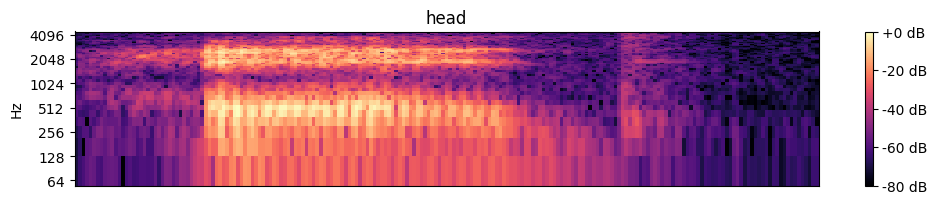

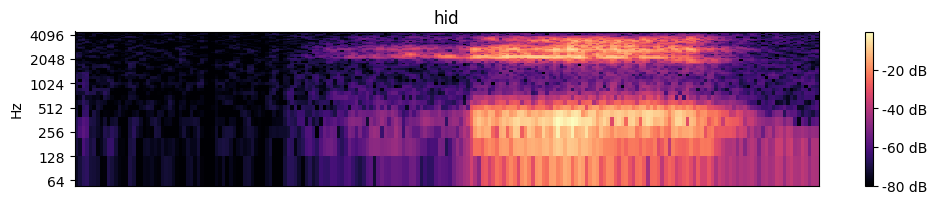

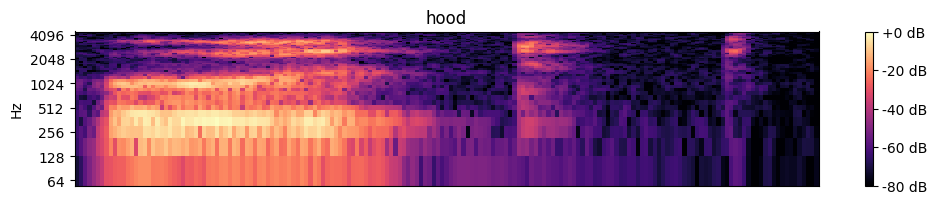

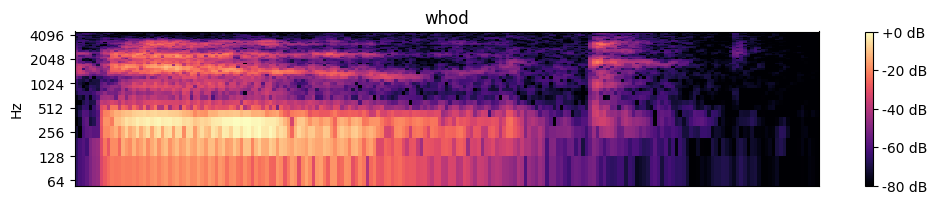

In [15]:
###############################
## Student activity solution #1
###############################

#for fileidx in [1,5]:
for phonemes in ['had','head','hid','hood','whod']:
  x_1, sr = librosa.load(basedir+'453353-'+phonemes+'.wav',offset=.1, duration=.6)
  plt.figure(figsize=(12, 2))
  D1 = librosa.amplitude_to_db(np.abs(librosa.stft(x_1,n_fft=256)),  ref=np.max)
  librosa.display.specshow(D1, y_axis='log')
  plt.title(phonemes)
  plt.ylim(50,4500)
  plt.colorbar(format='%+2.0f dB')
  # Playback
  ipd.display(ipd.Audio(x_1, rate=sr))


### **Live coding:** Extracting F1, F2
First we will create a new folder named **plots** using the `os.mkdir` method and the `try except` block for error handling.

In [16]:
try:
    os.mkdir('plots')
except OSError:
    print('plots directory already exists')

1. We will read the wav file for the word **"had"**. We do not need to process the entire file. All files start with a short silence and duration of 0.5 s will suffice.
2. We will use `fftpack.fft` to get the frequency spectrum components for the files. `fftpack.fftfreq` will give us the frequencies associated with the intensities.
3. We will use `plotSpectum` to save the plots into our **plots** sub directory.

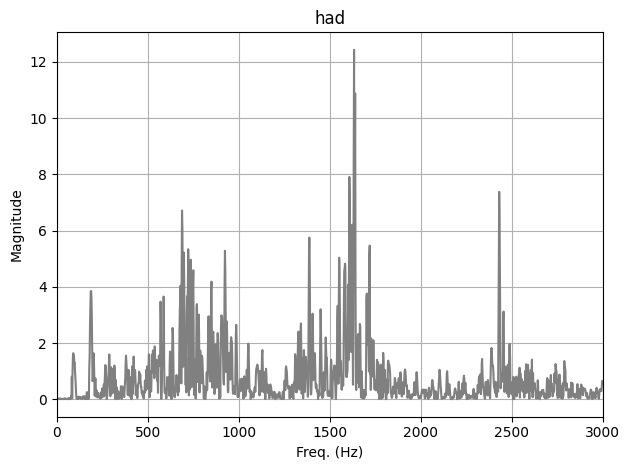

In [17]:
# Load file and organise spectrum components
name = 'had'
fname = '453353-had.wav'
x_1, fs = librosa.load(basedir+fname,duration=0.5)

X = fftpack.fft(x_1) #get the FFT intensities
freq=fftpack.fftfreq(len(x_1))*fs # get the corresponding frequencies
freqidx=int(len(freq)/2) # ignore the negitive mirror image of fft
freq=freq[1:freqidx] # get the freqs
mag=np.abs(X.real) # that the real absolute magnitudes
mag=mag[1:freqidx] # for the positive freqs
plotSpectrum(freq, mag, name)

4. We will use the librosa peakfinder `librosa.util.peak_pick` method to find the peaks in the signal.
5. Using the peak indexes we will create lists of the frequencies and magnitudes corresponding to those peaks. We will use them to populate a data frame.

In [18]:
#use librosa peak_pick utility to find peaks
indexes = librosa.util.peak_pick(mag, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.1, wait=1)

peaks=[freq[indexes],mag[indexes]]

peaksdf=pd.DataFrame(peaks).T
peaksdf.columns=['freq','mag']
peaksdf

,freq,mag
0,90.0,1.637866
1,166.0,0.253844
2,188.0,3.849643
3,202.0,1.634118
4,212.0,0.739918
...,...,...
172,3110.0,0.426377
173,3120.0,0.798275
174,3148.0,0.508839
175,3314.0,0.197464


6. Using the rough approximation from the graph we introduced in the lecture, we make the assumption that $250 \leq F1 \leq 650$ and $650 \leq F2 \leq 2600$.
6. Using the `between` and `idxmax()` methods we will find the F1 and F2 values.
7. We will print the word and their corresponding F1 and F2 values.

Word: had 
 F1: 586.00 
 F2: 1634.00


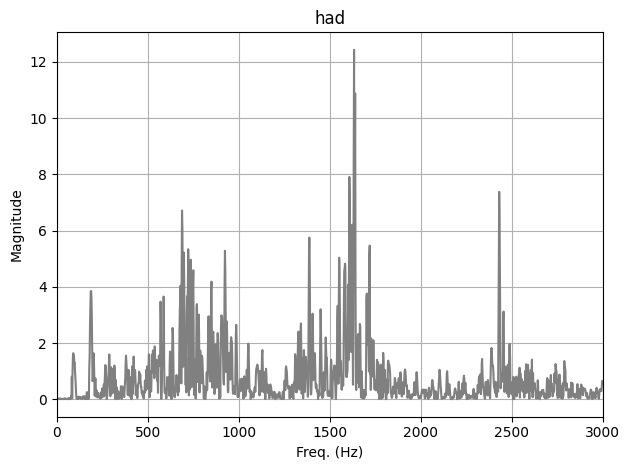

In [19]:
# find the first and second formant:
# first formant is max peak between ~ 250 and  650 Hz
# second formant is max peak between ~ 650 and 2600 Hz

fmin = 250
f1max=650
f2max=3000
peaksdf=pd.DataFrame(peaks).T # Create a dataframe and transpose rows to cols
peaksdf.columns=['freq','mag']    # label them
f1peaks=peaksdf[peaksdf.freq.between(fmin,f1max)] #get the frequencies in formant 1 freq range
f1=f1peaks['freq'][f1peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

f2peaks=peaksdf[peaksdf.freq.between(f1max,f2max)] #get the frequencies in formant 1 freq range
f2=f2peaks['freq'][f2peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

print('Word: had \n F1: {:.2f} \n F2: {:.2f}'.format(f1,f2))
plotSpectrum(freq, mag, name)

### **Student activity #2:** Computing speech spectrum and extracting F1 and F2 for multiple files
* Use the **phonemefilenames** list and the method `enumerate` to iteratively load all files in the list. Set the `offset` and `duration` to 0.1 and 0.6 respectively.
* Adapt the code above to iteratively plot the spectrum and compute F1 and F2 values for all files in the **phonemefilenames** list.
* Insert F1 and F2 values into the dataframe we created earlier (**dfformants**) and save that to a csv file (**speakerformants.csv**).

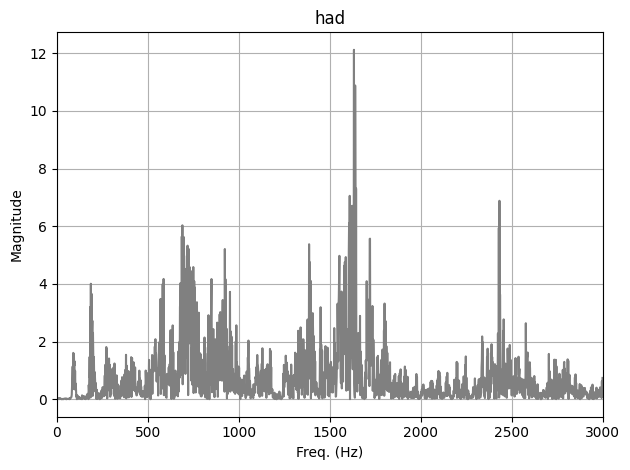

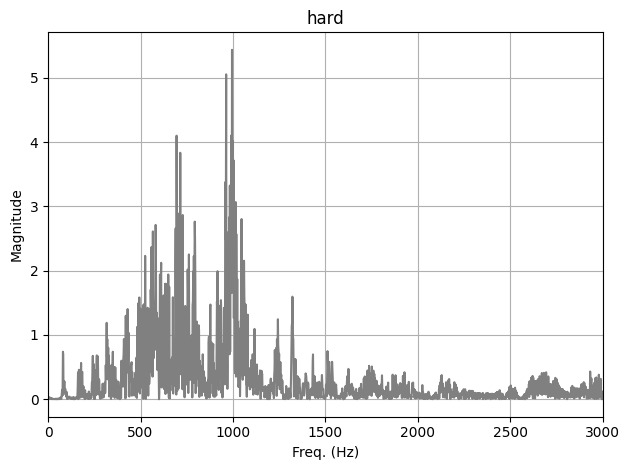

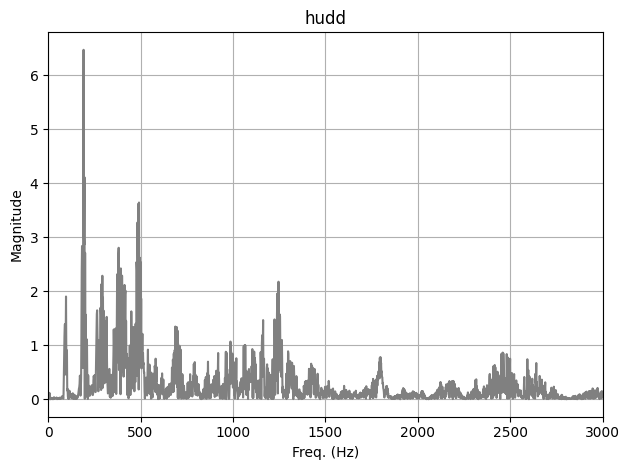

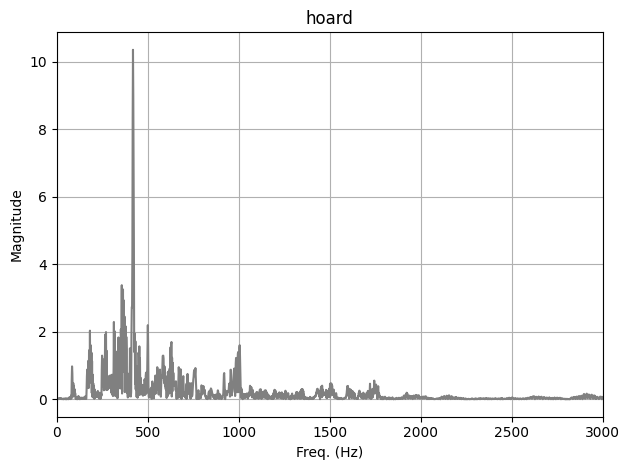

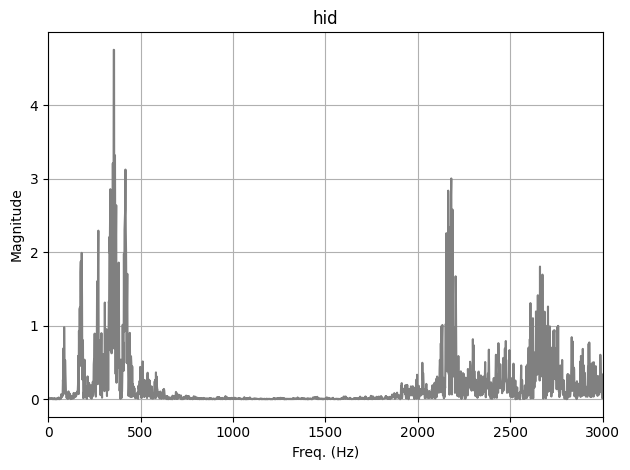

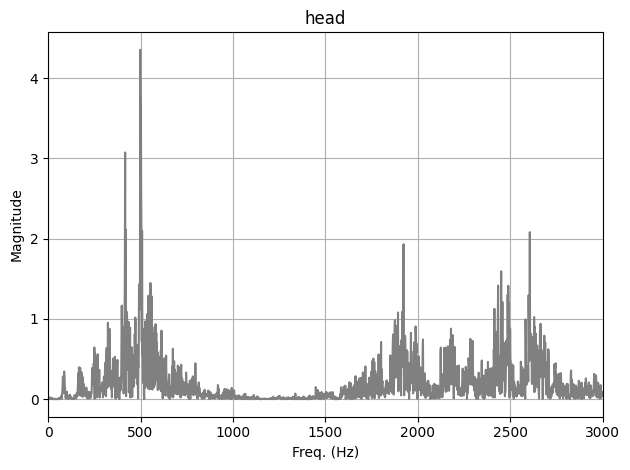

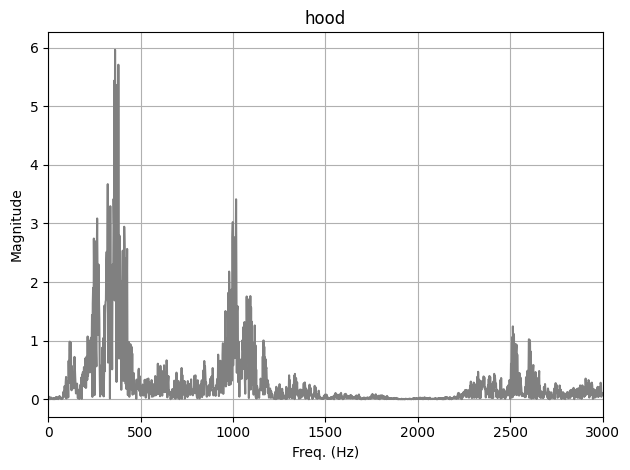

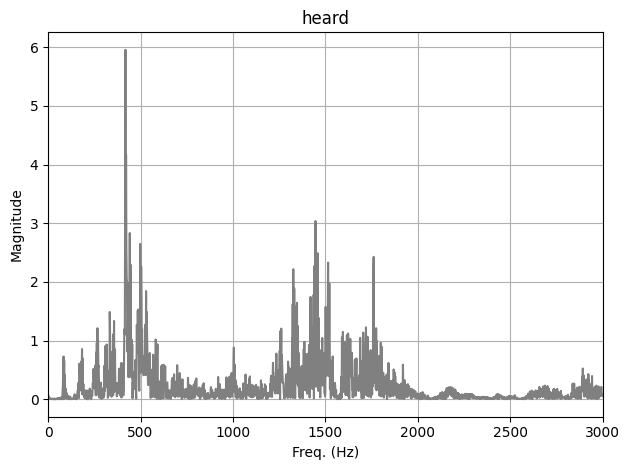

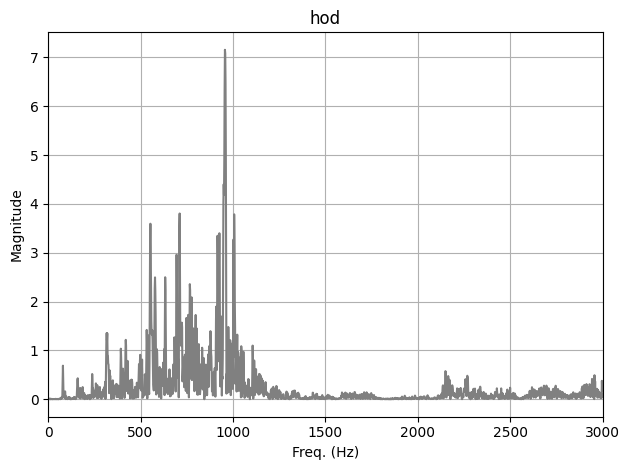

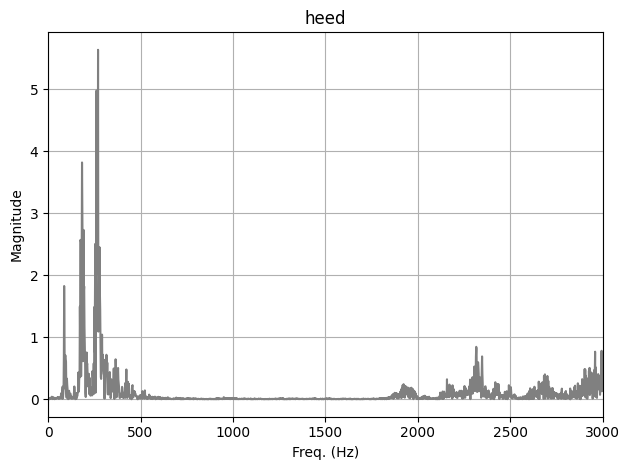

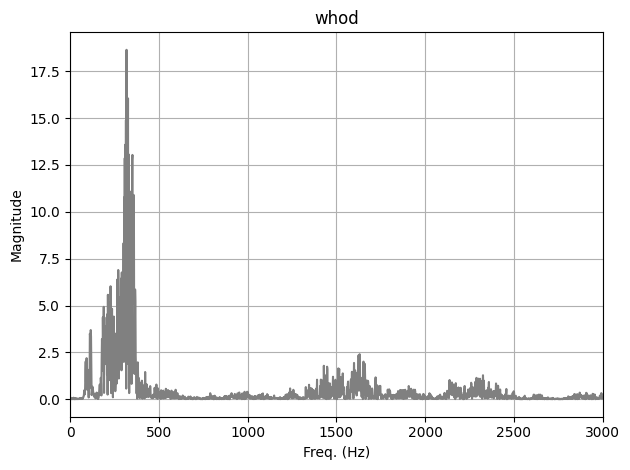

In [20]:
###############################
## Student activity solution #2
###############################

formants=[[],[]]

for idx,fname in enumerate(phonemefilenames):
      x_1, fs = librosa.load(basedir+fname,duration=0.6, offset=.1)
      X = fftpack.fft(x_1) #get the FFT intensities
      freq=fftpack.fftfreq(len(x_1))*fs # get the corresponding frequencies
      freqidx=int(len(freq)/2) # ignore the negitive mirror image of fft
      freq=freq[1:freqidx] # get the freqs
      mag=np.abs(X.real) # that the real absolute magnitudes
      mag=mag[1:freqidx] # for the positive freqs

      # Plot spectrum
      plotSpectrum(freq, mag, phonemenames[idx])

      #use librosa pick utility to find peaks
      indexes = librosa.util.peak_pick(mag, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.1, wait=1)
      peaks=[freq[indexes],mag[indexes]]
      peaksdf=pd.DataFrame(peaks).T
      peaksdf.columns=['freq','mag']

      # find the first and second formant:
      # first formant is max peak between ~ 250 and  650 Hz
      # second formant is max peak between ~ 650 and 2600 Hz

      fmin = 250
      f1max=650
      f2max=3000
      peaksdf=pd.DataFrame(peaks).T # Create a dataframe and transpose rows to cols
      peaksdf.columns=['freq','mag']    # label them
      f1peaks=peaksdf[peaksdf.freq.between(fmin,f1max)] #get the frequencies in formant 1 freq range
      f1=f1peaks['freq'][f1peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

      f2peaks=peaksdf[peaksdf.freq.between(f1max,f2max)] #get the frequencies in formant 1 freq range
      f2=f2peaks['freq'][f2peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

      formants[0].append(f1)
      formants[1].append(f2)


dfformants['f1']=formants[0]
dfformants['f2']=formants[1]


dfformants.to_csv('speakerformants.csv')

### **Live coding:** Vowel F1/F2 visualization
Using the extracted F1 and F2 values we will generate a scatter plot for all words in the **dfformants** data frame.
1. Using the `scatter` method we will plot **-(F2-F1)** vs **F1** for all words.
2. We will annotate the names for each word in the scatter plot.
3. We will save the figure in the **plots** sub diresctory as **vowelf1f2male453353.png**
4. We will print the **dfformants** data frame to inspect our plot and the F1 and F2 values.

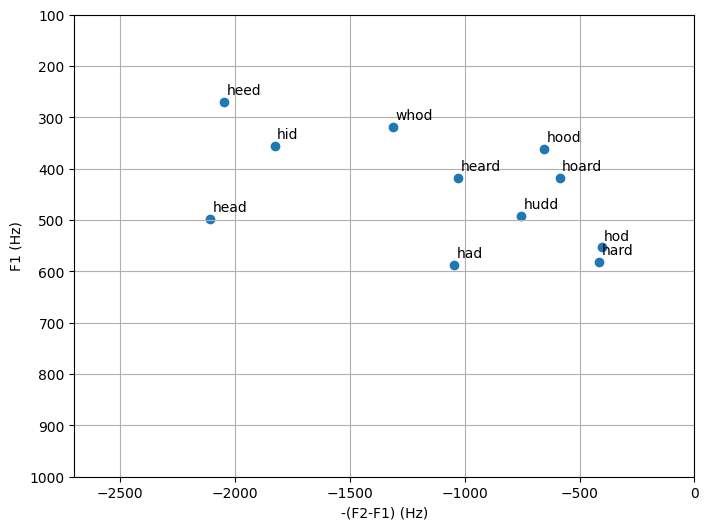

In [21]:
fig1=plt.figure(figsize=(8, 6))
ax2=fig1.add_subplot(111)
plt.scatter(-(dfformants['f2']-dfformants['f1']),dfformants['f1'])

for idx, phonemename in enumerate(phonemenames):
    ax2.annotate(phonemename,  xy=(-(formants[1][idx]-formants[0][idx])+10,formants[0][idx]-15))

plt.xlim((-2700, 0))
plt.ylim((1000, 100))
plt.grid(axis='both')
plt.xlabel('-(F2-F1) (Hz)')
plt.ylabel('F1 (Hz)')

plt.savefig('plots/vowelf1f2male453353.png')
plt.show()

In [22]:
dfformants

,speaker,word,f1,f2
0,453353,had,586.666667,1633.333333
1,453353,hard,581.666667,995.000000
2,453353,hudd,491.666667,1246.666667
3,453353,hoard,418.333333,1005.000000
4,453353,hid,355.000000,2181.666667
5,453353,head,498.333333,2606.666667
6,453353,hood,362.091709,1017.022613
7,453353,heard,418.333333,1446.666667
8,453353,hod,553.333333,956.666667
9,453353,heed,270.000000,2316.666667


### **Live coding:** Computing the Fundamental Frequency (F0)

* Describes the tone of the voice (roughly in the range 80 to 450 Hz).
* Closely related to pitch, F0 describes the actual physical phenomenon, whereas pitch describes how our ears and brains interpret the signal.
* `librosa` provides the `pyin` function to compute F0 using a modified version of the YIN algorithm.

Reference:
* [Introduction to Speech Processing](https://speechprocessingbook.aalto.fi/)
* [Mauch, Matthias, and Simon Dixon. “pYIN: A fundamental frequency estimator using probabilistic threshold distributions.” 2014 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP). IEEE, 2014.](https://www.eecs.qmul.ac.uk/~simond/pub/2014/MauchDixon-PYIN-ICASSP2014.pdf)

<ipython-input-23-5449e1cf51fe>:2: DeprecationWarning: `scipy.signal.waveforms.nan` is deprecated along with the `scipy.signal.waveforms` namespace. `scipy.signal.waveforms.nan` will be removed in SciPy 1.14.0, and the `scipy.signal.waveforms` namespace will be removed in SciPy 2.0.0.
  from scipy.signal.waveforms import nan


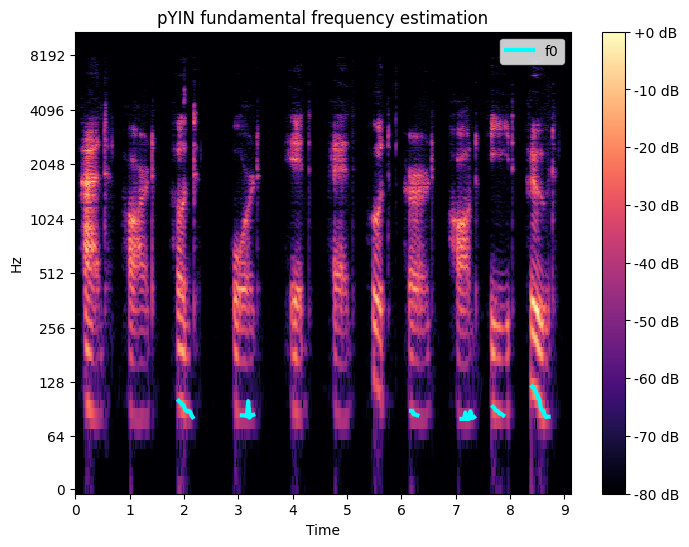

In [23]:
#from pandas.core.internals.concat import concat_arrays
from scipy.signal.waveforms import nan
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import scipy

#create a single sample array containing all the words
concat_words_y=np.array([])
for idx,fname in enumerate(phonemefilenames):
    y, sr = librosa.load(basedir+fname)
    concat_words_y=np.append(concat_words_y,y)
y=concat_words_y

#run pyin to estimate pitch/f0

f0, voiced_flag, voiced_probs = librosa.pyin(y, sr=sr,
                                          fmin=80,
                                          fmax=450)
# Pitch range for humans is 70-900 Hz (Heylen et al., 2002)

times = librosa.times_like(f0)

# plot the spectro and overlay the pitch estimate

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots(figsize=(8, 6))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

Compute the average f0 (pitch) from the non-nan pitch estimates.

In [24]:
f0nonan=f0[np.logical_not(np.isnan(f0))]
f0mean=np.mean(f0nonan)
print(f0mean)

89.25266448853591


# Assignment 3

### Question 1

**Analyse speech and audio signals and features.**

Record yourself speaking each of the following 11 words clearly and distinctly.

 - hid
 - hood
 - head
 - whod
 - heed
 - hudd
 - hod
 - had
 - heard
 - hard
 - hoard

Save each file in 16-bit mono format with a filename following this format: **452352-\<phonemename\>.wav.** using `452352` as your unique 6-digit speaker ID. Your wav files should look like this: `452352-hid.wav`, `452352-hood.wav`, etc. Create a folder `phonemes_student` and store the 11 wav files there. Upload this folder to your Colab environment.

**Note:** Remember to attach your `phonemes_student` folder as a zip file when you submit your assignment at Brightspace.

Create a Pandas dataframe with columns: `["speaker", "word", "F1", "F2"]`. Populate the dataframe for all the files in the three folders `phonemes`, `synthetic`, `phonemes_student`.

**Note:** Set the `offset` and `duration` to 0.1 and 0.6 respectively to calculate F1 and F2 values

Plot F1 vs -(F2-F1) for the three sets of words: 1) original set of words `phonemes`, 2) synthetic set of words `synthetic`, and 3) your own voice recordings `phonemes_student`. Set different colours for each speaker. Add a text annotation with the phoneme word (as done in PL3).

Compare the plotted points for each of the three sets of words highlighting the following aspects:
 - Do the points for the multiple utterances of the same word cluster together?
 - Do the points for synthetic utterances cluster together with natural utterances?
 - Does the original utterances clustered with yours?


In [ ]:
# was using local jupyter notebook so file present locally should run smoothly without uploading or anything 

ModuleNotFoundError: No module named 'google'

In [ ]:
# i decided to make a recorder first to help me record the audio in the right format as a helper which checks if the folder phonemes_studnet is present or not and if present is empty or not then proceeds to prompt the user to record the audio and save it in the folder phonemes_student


In [18]:
import sounddevice as sd # Used for recording
import scipy.io.wavfile as wavfile

### Cell to generate phonemes


In [ ]:
# I have made fail safe so that if jupyter notebook runs all and the folder already exists it does not get stuck 
# i used this script to record audio.

def record_and_save_phonemes():
    phonemes = ['hid', 'hood', 'head', 'whod', 'heed', 'hudd', 'hod', 'had', 'heard', 'hard', 'hoard']
    speaker_id = '452352'
    folder = 'phonemes_student'
    
    # Create folder if it doesn't exist
    if not os.path.exists(folder):
        os.makedirs(folder)
        print("Folder created:", folder)

    fs = 22050  # Sampling rate
    duration = 1.0  # Duration in seconds

    # Check if all phoneme files already exist
    all_exist = True
    for word in phonemes:
        filename = os.path.join(folder, f"{speaker_id}-{word}.wav")
        if not os.path.exists(filename):
            all_exist = False
            break

    if all_exist:
        print("All phoneme recordings already exist. Exiting function.")
        return

    for word in phonemes:
        filename = os.path.join(folder, f"{speaker_id}-{word}.wav")

        if os.path.exists(filename):
            print(f"File '{filename}' already exists. Skipping recording...")
            continue
        
        input(f"Press Enter to record '{word}': ")
        print(f"Recording '{word}'...")
        recording = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='int16')
        sd.wait()
        wavfile.write(filename, fs, recording)
        print(f"Saved '{filename}'.")


Recording 'hid'...
Saved 'phonemes_student/452352-hid.wav'.
Recording 'hood'...
Saved 'phonemes_student/452352-hood.wav'.
Recording 'head'...
Saved 'phonemes_student/452352-head.wav'.
Recording 'whod'...
Saved 'phonemes_student/452352-whod.wav'.
Recording 'heed'...
Saved 'phonemes_student/452352-heed.wav'.
Recording 'hudd'...
Saved 'phonemes_student/452352-hudd.wav'.
Recording 'hod'...
Saved 'phonemes_student/452352-hod.wav'.
Recording 'had'...
Saved 'phonemes_student/452352-had.wav'.
Recording 'heard'...
Saved 'phonemes_student/452352-heard.wav'.
Recording 'hard'...
Saved 'phonemes_student/452352-hard.wav'.
Recording 'hoard'...
Saved 'phonemes_student/452352-hoard.wav'.


   speaker   word          F1           F2
0   453353   hard  581.666667   995.000000
1   453353    had  586.666667  1633.333333
2   453353  heard  418.333333  1446.666667
3   453353   hudd  491.666667  1246.666667
4   453353   hood  362.091709  1017.022613
5   453353  hoard  418.333333  1005.000000
6   453353   head  498.333333  2606.666667
7   453353    hid  355.000000  2181.666667
8   453353    hod  553.333333   956.666667
9   453353   whod  318.333333  1631.666667
10  453353   heed  270.000000  2316.666667
11  451351  hoard  514.290797   772.307875
12  451351   head  316.613114   823.636911
13  451351   hood  502.951542  1340.484581
14  451351    had  295.000000  1028.333333
15  451351   hudd  561.054378   743.068675
16  451351  heard  421.606119  1509.751434
17  451351   hard  368.578767   925.941781
18  451351   heed  380.612154  2511.255450
19  451351   whod  432.538931  1307.102297
20  451351    hid  465.909091  2336.363636
21  451351    hod  591.838120  1029.383812
22  452352 

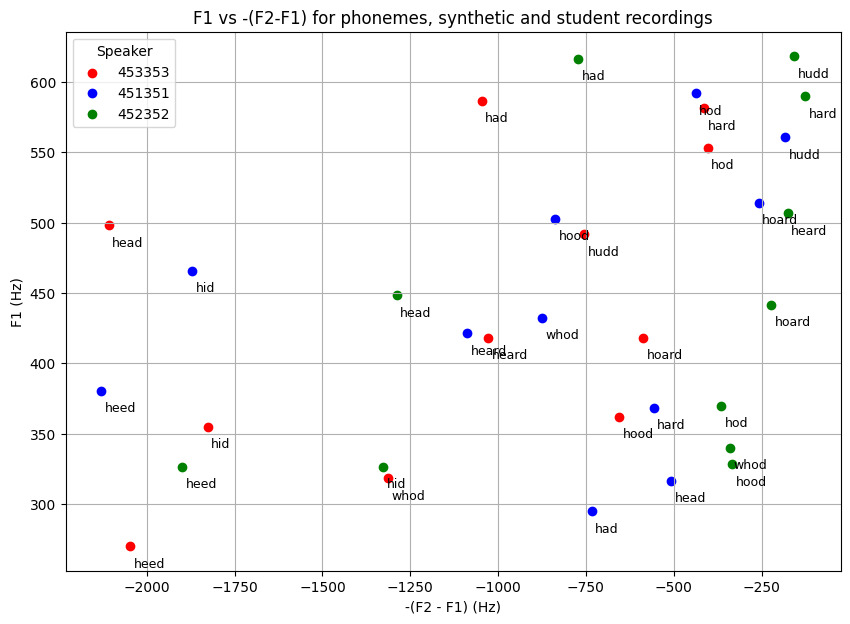

In [23]:
# Define a helper function to process a folder and compute F1 and F2 for every wav file in that folder.
def compute_formants_for_folder(folder_path):
    # List wav files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]
    records = []
    for fname in files:
        # Extract speaker and word from filename (format: speaker-word.wav)
        parts = fname.split('-')
        speaker = parts[0]
        word = parts[1].split('.')[0]
        
        # Load wav file using offset and duration as specified
        try:
            signal, fs = librosa.load(os.path.join(folder_path, fname), offset=0.1, duration=0.6)
        except Exception as e:
            print(f"Failed to load {fname}: {e}")
            continue

        # Compute FFT and extract frequency spectrum
        X = fftpack.fft(signal)
        freqs = fftpack.fftfreq(len(signal)) * fs
        half_range = int(len(freqs)//2)
        freqs = freqs[1:half_range]
        mags = np.abs(X.real)[1:half_range]

        # Use peak picking to find the peaks
        indexes = librosa.util.peak_pick(mags, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.1, wait=1)
        if len(indexes) == 0:
            print(f"No peaks found for file {fname}")
            continue
        peaks = {'freq': freqs[indexes], 'mag': mags[indexes]}
        peaksdf = pd.DataFrame(peaks)
        
        # Define thresholds for formants
        fmin = 250
        f1max = 650
        f2max = 3000
        
        # get F1: peak with max amplitude in frequency range 250 - 650 Hz
        f1_peaks = peaksdf[peaksdf.freq.between(fmin, f1max)]
        if f1_peaks.empty:
            f1 = np.nan
        else:
            f1 = f1_peaks.loc[f1_peaks.mag.idxmax(), 'freq']
        
        # get F2: peak with max amplitude in frequency range 650 - 3000 Hz
        f2_peaks = peaksdf[peaksdf.freq.between(f1max, f2max)]
        if f2_peaks.empty:
            f2 = np.nan
        else:
            f2 = f2_peaks.loc[f2_peaks.mag.idxmax(), 'freq']
        
        records.append({'speaker': speaker, 'word': word, 'F1': f1, 'F2': f2})
    return pd.DataFrame(records)

# Process each folder.
folder_phonemes = './PL3_files/phonemes/'  
folder_synthetic = './PL3_files/synthetic/'    
folder_student = './phonemes_student/'

df_phonemes = compute_formants_for_folder(folder_phonemes)
df_synthetic = compute_formants_for_folder(folder_synthetic)
df_student = compute_formants_for_folder(folder_student)

# Create a combined dataframe
df_combined = pd.concat([df_phonemes, df_synthetic, df_student], ignore_index=True)
print(df_combined)

# Plot F1 vs -(F2-F1) with different colors per speaker
speakers = df_combined['speaker'].unique()
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
color_map = {sp: colors[i % len(colors)] for i, sp in enumerate(speakers)}

plt.figure(figsize=(10, 7))
for idx, row in df_combined.iterrows():
    if pd.notna(row['F1']) and pd.notna(row['F2']):
        x_val = -(row['F2'] - row['F1'])
        y_val = row['F1']
        plt.scatter(x_val, y_val, color=color_map[row['speaker']], label=row['speaker'] if row['speaker'] not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.text(x_val+10, y_val-15, row['word'], fontsize=9)
plt.xlabel("-(F2 - F1) (Hz)")
plt.ylabel("F1 (Hz)")
plt.title("F1 vs -(F2-F1) for phonemes, synthetic and student recordings")
plt.grid(True)
plt.legend(title="Speaker")
plt.show()

## Observation 



### Question 2

**Articulate the characteristics of speech and speech production.**

As done in PL3, concatenate the words for all three sets. You should have three sets of words (`phonemes`, `synthetic`, and `phonemes_student`). Run `pyin` to estimate pitch/f0 for each set of words (speaker). Plot the spectro and overlay the pitch estimate. Compute the average pitch from the non-nan pitch estimates.

In [ ]:
# Function to process audio files from a folder and return concatenated audio
def concatenate_audio_from_folder(folder_path):
    concat_audio = np.array([])
    for fname in sorted(os.listdir(folder_path)):
        if fname.endswith('.wav'):
            y, sr = librosa.load(os.path.join(folder_path, fname))
            concat_audio = np.append(concat_audio, y)
    return concat_audio, sr

# Function to analyze pitch using pYIN and plot results
def analyze_and_plot_pitch(audio, sr, title):
    # Compute pYIN pitch estimation
    f0, voiced_flag, voiced_probs = librosa.pyin(audio, 
                                                sr=sr,
                                                fmin=80,
                                                fmax=450)
    
    # Calculate average F0 (excluding nan values)
    f0_mean = np.nanmean(f0)
    
    # Create time axis
    times = librosa.times_like(f0)
    
    # Compute spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 6))
    img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
    ax.set(title=f'{title}\nMean F0: {f0_mean:.1f} Hz')
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    return f0_mean

# Process each folder
folders = {
    'Original': './PL3_files/phonemes/',
    'Synthetic': './PL3_files/synthetic/',
    'Student': './phonemes_student/'
}

# Analyze each set
for name, folder in folders.items():
    try:
        print(f"\nProcessing {name} recordings...")
        audio, sr = concatenate_audio_from_folder(folder)
        if len(audio) > 0:
            mean_f0 = analyze_and_plot_pitch(audio, sr, f"{name} Recordings")
            print(f"Average F0 for {name} recordings: {mean_f0:.1f} Hz")
        else:
            print(f"No audio files found in {folder}")
    except Exception as e:
        print(f"Error processing {name} recordings: {str(e)}")

### Question 3

**Explore different methods to estimate the characteristics of speech.**

Explore a new algorithm 'CREPE' for f0 estimation. Run `CREPE` to estimate pitch/f0 for each of the three (`phonemes`, `synthetic`, and `phonemes_student`) set of words (speaker). Plot the spectro and overlay the pitch estimate. Compute the average pitch from the non-nan pitch estimates.

**Note:** Here is the github repo for CREPE.
https://github.com/marl/crepe


(a) Explore the return values of crepe algorithm and explain the meaning of each return value.

(b) Compare and contrast the results produced by the two algorithms `pyin` and `CREPE`, highlighting which algorithm produces more accurate pitch estimation and explaining your rationale.

### Question 4

**Comparing different pitch estimation algorithms**

Using the `pyin` and `CREPE` algorithms, estimate the pitch/f0 of the audio file `sample_audio_pitch.wav`. Compute the long term (average) f0 for the files.

(a) Compare and contrast the results and explain why you think the results are not the same.
(b) Suggest and evaluate a method to improve the results (e.g. through pre- or post- processing), explaining your rationale and your implemented technique.